In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
def solve_first_order_ode(x0, f0, xf, Nsteps, dfdx):
    # step size
    dx = (xf - x0)/Nsteps
    # solutions of f(x) go here
    fx = np.zeros(Nsteps+1)
    # discrete values of x
    xx = np.zeros(Nsteps+1)
    # put in initial conditions
    fx[0] = f0
    xx[0] = x0
    for i in range(Nsteps):
        # apply Euler's method
        xx[i+1] = xx[i] + dx
        derivative = dfdx(xx[i], fx[i])
        fx[i+1] = fx[i] + derivative*dx
    return xx, fx

In [26]:
def flinear(x, fx):
    return x

def fcos(x, fx):
    return np.cos(x)

def fnegexp(x, fx):
    return np.exp(-x)

def complicated_function(x, fx):
    return (1 + np.cos(x))/(1 + 2*fx)

In [30]:
x1, f1 = solve_first_order_ode(0, 0, 5, 10000, flinear)
x2, f2 = solve_first_order_ode(0, 0, 5, 10000, fcos)
x3, f3 = solve_first_order_ode(0, 0, 5, 10000, fnegexp)
x4, f4 = solve_first_order_ode(0, 0, 5, 10000, complicated_function)

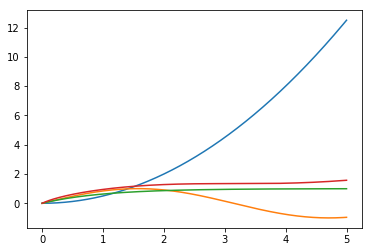

In [31]:
plt.plot(x1, f1)
plt.plot(x2, f2)
plt.plot(x3, f3)
plt.plot(x4, f4)

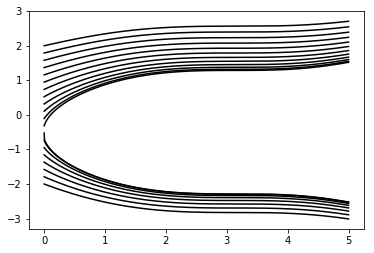

In [39]:
# solve dfdx = (1 + cos(x))/(1 + 2*x) for a range of ICs
NIC = 20
IC = np.linspace(-2, 2, NIC)
for i in range(NIC):
    x, fx = solve_first_order_ode(0, IC[i], 5, 1000, complicated_function)
    plt.plot(x, fx, 'k')